In [2]:
from TSInterpret.data import load_data
import sklearn
import pickle
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [3]:
dataset='NATOPS'

# Load Data

In [4]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [5]:
print(train_x.shape)
print(test_x.shape)

(180, 51, 24)
(180, 51, 24)


In [6]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../ClassificationModels/models/{dataset}/OneHotEncoder_tf.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Load Model

In [7]:

import tensorflow as tf 
model = tf.keras.models.load_model(f'../ClassificationModels/models/{dataset}/cnn/NATOPSbest_model.hdf5')

2022-06-13 15:38:53.600888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 15:38:53.600904: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-13 15:38:54.731809: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-13 15:38:54.732230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 15:38:54.732300: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

# Explanation Algo

In [8]:
item=test_x[10].reshape(1,test_x.shape[1],test_x.shape[2])
shape=item.shape
y_target= model.predict(item)

1/1 [==============================] - 0s 96ms/step


In [10]:
from TSInterpret.InterpretabilityModels.counterfactual.Ates import AtesCF

exp_model= AtesCF(model,(train_x,train_y),mode='time', backend='TF')


In [11]:
exp = exp_model.explain(item,3, method= 'opt')

1/1 [==============================] - 0s 17ms/step
Target [3]


In [12]:
array, label=exp

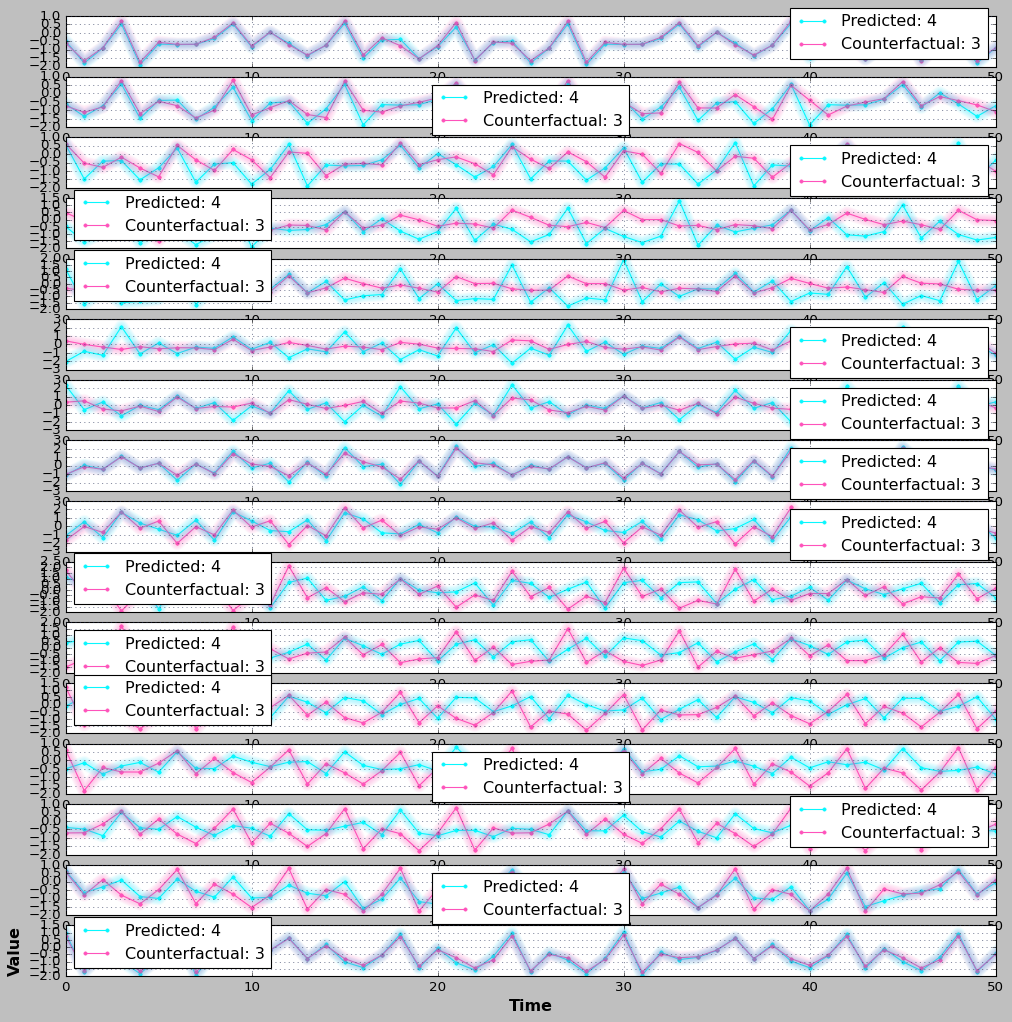

In [13]:
%matplotlib inline

org_label=np.argmax(y_target)
cf_label=label[0]
exp=array

exp_model.plot(item,org_label,exp,cf_label,figsize=(15,15))